In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy

pd.set_option('display.max_columns', None)

In [2]:
path = '/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/30.csv'

class_data = pd.read_csv(path)

class_data.head(5)

class_data = class_data.dropna(how='any')

class_data.head(5)

class_data = class_data.replace('_', '', regex=True)
class_data = class_data.replace('/', '', regex=True)
class_data.head(5)
class_data.drop(columns=class_data.columns[0], axis=1, inplace=True)
convert_dict = {'DatasetID': int}
class_data = class_data.astype(convert_dict)
class_data.head(5)

class_data = class_data.sort_values(by=['Exp_Name','Condition', 'Level', 'Triplicate'], ascending=True)
class_data.head(-1)

#print(class_data[(class_data.Exp_Name == 'classfull') & (class_data.Level == '0.01')]['Exp2ImputeModel'].value_counts())

,DatasetID,Exp_Name,Condition,Level,Triplicate,Exp1ImputeRMSEAcc,Exp2ImputeModel,Exp2train_auroc,Exp2train_accuracy,Exp2train_balanced_accuracy,Exp2train_logloss,Exp2train_f1,Exp2ori_auroc,Exp2ori_accuracy,Exp2ori_balanced_accuracy,Exp2ori_logloss,Exp2ori_f1,Exp2impute_auroc,Exp2impute_accuracy,Exp2impute_balanced_accuracy,Exp2impute_logloss,Exp2impute_f1,Exp2ClassifierModel,Exp2duration,Exp3train_auroc,Exp3train_accuracy,Exp3train_balanced_accuracy,Exp3train_logloss,Exp3train_f1,Exp3ori_auroc,Exp3ori_accuracy,Exp3ori_balanced_accuracy,Exp3ori_logloss,Exp3ori_f1,Exp3impute_auroc,Exp3impute_accuracy,Exp3impute_balanced_accuracy,Exp3impute_logloss,Exp3impute_f1,Exp3ImputeModel,Exp3ImputeRMSEAcc,Exp3ClassifierModel,Exp3duration
12,30,classfull,MAR,0.01,1,0.016025,IterativeImputer,0.999699,0.990863,0.952938,0.034917,0.990792,0.997940,0.972628,0.751503,0.066207,0.971142,0.997940,0.972628,0.751503,0.066207,0.971142,RandomForestClassifier,3982.565915,0.999617,0.988629,0.925738,0.038963,0.988409,0.997725,0.979927,0.864634,0.072267,0.979589,0.997725,0.979927,0.864634,0.072143,0.979589,KNNImputer,0.038405,ExtraTreesClassifier,9016.492671
36,30,classfull,MAR,0.01,2,0.011169,IterativeImputer,0.999957,0.997360,0.989409,0.012202,0.997376,0.997493,0.981752,0.861000,0.062457,0.981607,0.997188,0.979927,0.854940,0.067389,0.979725,XGBClassifier,1640.185265,0.999003,0.988020,0.957278,0.053077,0.987458,0.998481,0.979927,0.839579,0.078653,0.979438,0.997519,0.979927,0.833518,0.086205,0.979287,IterativeImputer,0.028294,LGBMClassifier,11279.809171
13,30,classfull,MAR,0.1,1,0.034186,IterativeImputer,0.999782,0.989645,0.994554,0.035176,0.989886,0.998208,0.972628,0.970473,0.085385,0.974017,0.997949,0.970803,0.964412,0.092964,0.972165,LGBMClassifier,3212.569765,0.999350,0.989442,0.984534,0.037072,0.989051,0.997897,0.972628,0.970473,0.078629,0.973898,0.997286,0.970803,0.942597,0.081833,0.973406,IterativeImputer,0.048603,LGBMClassifier,8469.169801
37,30,classfull,MAR,0.1,2,0.016087,IterativeImputer,0.999915,0.994315,0.995595,0.018574,0.994412,0.997839,0.976277,0.935735,0.073057,0.976625,0.997823,0.974453,0.935329,0.072679,0.975000,LGBMClassifier,1550.761236,0.999679,0.990660,0.991573,0.037420,0.990853,0.998333,0.974453,0.970880,0.079471,0.975622,0.998282,0.967153,0.953104,0.088311,0.970374,IterativeImputer,0.030036,LGBMClassifier,9408.177462
14,30,classfull,MAR,0.3,1,0.023621,IterativeImputer,0.998169,0.979695,0.902524,0.052213,0.979618,0.996702,0.965328,0.832299,0.080431,0.965232,0.992008,0.941606,0.844789,0.134399,0.945578,MLPClassifier,4419.978707,0.999979,0.996751,0.997398,0.013291,0.996787,0.997680,0.972628,0.964819,0.077409,0.973715,0.997472,0.970803,0.936943,0.079911,0.971889,KNNImputer,0.034982,LGBMClassifier,11846.316097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,30,classsimple,MNAR,0.3,1,0.072229,SimpleImputer,0.999998,0.998985,0.999774,0.007059,0.998989,0.994587,0.965328,0.796736,0.128221,0.965981,0.983175,0.954380,0.677950,0.168194,0.953461,LGBMClassifier,3053.753440,0.999973,0.996954,0.999321,0.013535,0.996982,0.993791,0.967153,0.929662,0.113095,0.968504,0.980562,0.956204,0.678357,0.151551,0.954229,SimpleImputer,0.077006,LGBMClassifier,886.583053
30,30,classsimple,MNAR,0.3,2,0.079336,SimpleImputer,1.000000,0.997157,0.999367,0.011633,0.997179,0.997627,0.974453,0.970880,0.081286,0.975602,0.989585,0.954380,0.650480,0.152092,0.953199,LGBMClassifier,1975.886740,1.000000,0.999797,0.999955,0.003274,0.999797,0.996853,0.968978,0.948657,0.084196,0.969976,0.969021,0.959854,0.623417,0.174521,0.956667,SimpleImputer,0.086060,LGBMClassifier,2953.070534
54,30,classsimple,MNAR,0.3,3,0.084978,SimpleImputer,1.000000,0.997563,0.999457,0.011368,0.997577,0.994829,0.968978,0.958352,0.101996,0.970172,0.979324,0.941606,0.666223,0.202933,0.941436,LGBMClassifier,2110.709768,1.000000,0.999797,0.998077,0.028721,0.999796,0.996324,0.961679,0.

Things to record~
Things to conduct pairwise comparion on:
(Within Each Dataset)
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five scores, RMSEAcc, and duration
graph differences

For all data, subgrouped by MAR, MNAR, and MCAR
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five, RMSEAcc, and duration
graph differences

For all data total:
Within the same (impute first vs exp):
significant differences between five scores, RMSEAcc, and duration
graph differences
Between Exps (Complex vs Simple only):
significant differences between five, RMSEAcc, and duration
graph differences


Counts/Proportions for graphing
(Within each dataset + for all data)
How often Exp2 Impute Model is selected (Impute First)
How often Exp2 Classifier Model is selected (Impute First)
How often Exp3 Impute Model is selected
How often Exp3 Classifier Model is selected 
avg f1 change over each level and type
*and for each of the five scorers
RMSEAcc changes over each level and type
duration changes over each type and level

Create clustering of all the data to see if any patterns emerge (can we reidentify the missingness groupings, even when they arnt explicitly stated?)
or if grouped by missing type, can we ID missing level? 

ANCOVA?

Start with Counts/Proportions for graphing
(Within each dataset + for all data)
How often 1.Exp2 Impute Model is selected (Impute First)
How often 2.Exp2 Classifier Model is selected (Impute First)
How often 3.Exp3 Impute Model is selected
How often 4.Exp3 Classifier Model is selected 
avg f1 change over each level and type
*and for each of the five scorers
RMSEAcc changes over each level and type
duration changes over each type and level


In [3]:
def display_model_proportions(df, exp, savepath, complex = False, dataset_list=None, show=False):
    if dataset_list is not None:
        temp = df.loc[df['DatasetID'].isin(dataset_list)].copy()
    else:
        temp = df.copy()
        dataset_list = 'All Datasets'
    if complex:
        name = 'classfull'
        temp = temp[temp.Exp_Name == name]
        
    else:
        name = 'classsimple'
        temp = temp[temp.Exp_Name == name]
        

    xvals = [0.01, 0.1, 0.3, 0.5]
    all_models = {}
    mar_models = {}
    mcar_models = {}
    mnar_models = {}

    match exp:
        case 1: 
           pipe = 'Exp2ImputeModel'
        case 2:
            pipe = 'Exp2ClassifierModel'
        case 3:
            pipe = 'Exp3ImputeModel'
        case 4: 
            pipe = 'Exp3ClassifierModel'

    for model in temp[pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[temp.Level == str(val)][pipe].value_counts()[model]/temp[temp.Level == str(val)][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        all_models[model] = new_list
    for model in temp[temp.Condition == 'MAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mar_models[model] = new_list
    for model in temp[temp.Condition == 'MCAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mcar_models[model] = new_list
    for model in temp[temp.Condition == 'MNAR'][pipe].unique():
        new_list = []
        for val in xvals:
            try:
                new_list.append(temp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][pipe].value_counts()[model]/temp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][pipe].value_counts().sum())
            except:
                new_list.append(0.0)
        mnar_models[model] = new_list
    fig, a = plt.subplots(2,2)
    for i, label in enumerate(all_models):
        a[0][0].plot(xvals,all_models[label], color="C"+str(i), label=str(label))
        try:
            a[0][1].plot(xvals,mar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][0].plot(xvals,mcar_models[label], color="C"+str(i))
        except:
            save = i
        try:
            a[1][1].plot(xvals, mnar_models[label], color="C"+str(i))
        except:
            save = i
            
    a[0][0].set_title('All Conditions')
    a[0][0].set_xticks(np.arange(0, 0.6, 0.1))  
    a[0][0].set_yticks(np.arange(0, 1.1, 0.2))      
    a[0][1].set_title('Missing At Random')
    a[0][1].set_xticks(np.arange(0, 0.6, 0.1))  
    a[0][1].set_yticks(np.arange(0, 1.1, 0.2))  
    a[1][0].set_title('Missing Completely At Random')
    a[1][0].set_xticks(np.arange(0, 0.6, 0.1))  
    a[1][0].set_yticks(np.arange(0, 1.1, 0.2))  
    a[1][1].set_title('Missing Not At Random')
    a[1][1].set_xticks(np.arange(0, 0.6, 0.1))  
    a[1][1].set_yticks(np.arange(0, 1.1, 0.2))  
    fig.suptitle(name+': '+ str(dataset_list)+' Frequency of Selected Models in ' + pipe)
    lgd=fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    fig.tight_layout()
    #fig.savefig(savepath + name+'_'+ str(dataset_list)+'_'+pipe+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    return

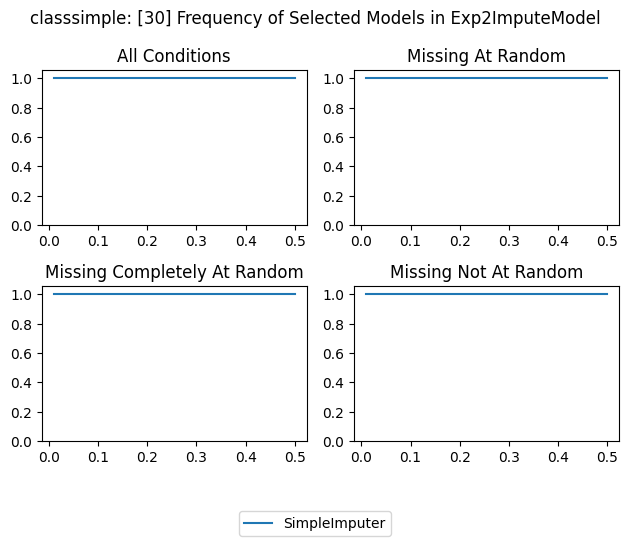

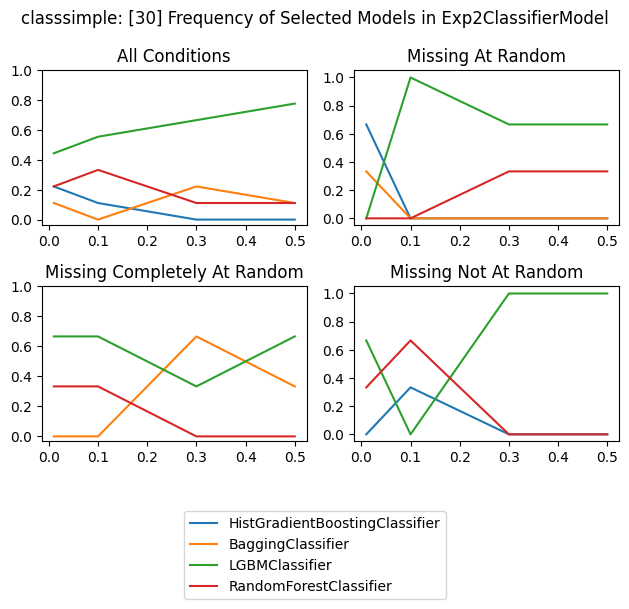

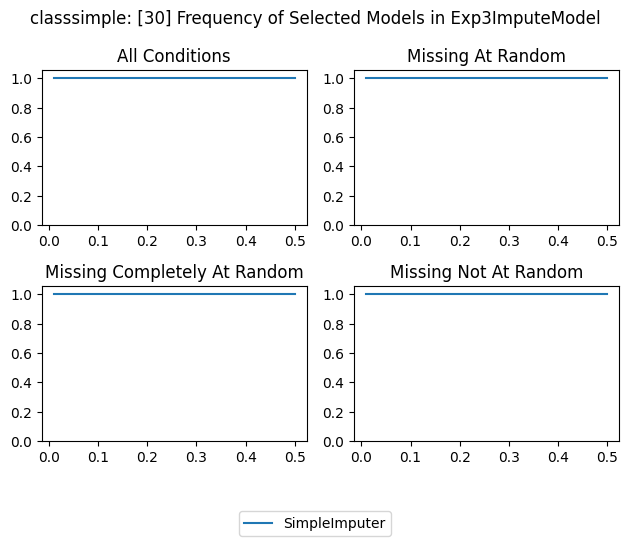

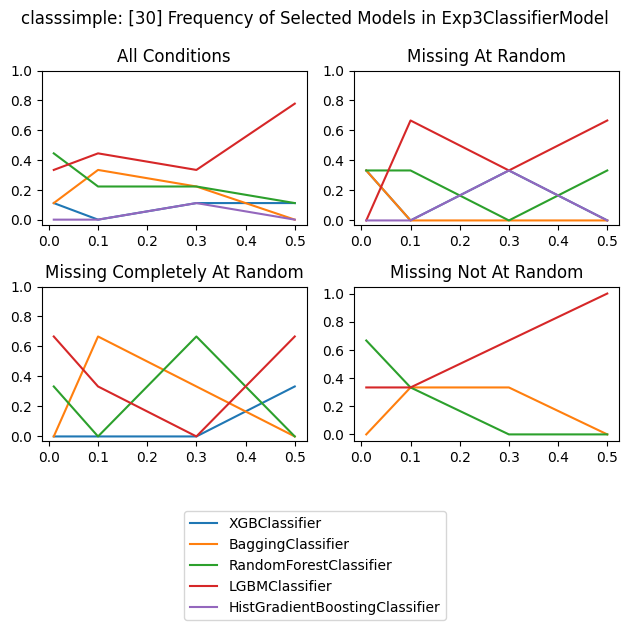

In [4]:
for i in range(1,5):
    display_model_proportions(class_data, exp=i, complex=False, savepath='/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/Saved_Analysis/', dataset_list=[30])


In [5]:
def display_scores_over_options(df, score_type, savepath, complex=False,
                                dataset_list=None):
    if dataset_list is not None:
        temp = df.loc[df['DatasetID'].isin(dataset_list)].copy()
    else:
        temp = df.copy()
        dataset_list = 'All Datasets'
    if complex:
        name = 'classfull'
        temp = temp[temp.Exp_Name == name]
        
    else:
        name = 'classsimple'
        temp = temp[temp.Exp_Name == name]
        

    xvals = [0.01, 0.1, 0.3, 0.5]
    all_models = {}
    mar_models = {}
    mcar_models = {}
    mnar_models = {}


    all_score = []
    for val in xvals:
        try:
            all_score.append(temp[temp.Level == str(val)][score_type].mean())
        except:
            all_score.append(0.0)
    mar_score = []
    for val in xvals:
        try:
            mar_score.append(temp[(temp.Condition == 'MAR')&(temp.Level == str(val))][score_type].mean())
        except:
            mar_score.append(0.0)

    mcar_score = []
    for val in xvals:
        try:
            mcar_score.append(temp[(temp.Condition == 'MCAR')&(temp.Level == str(val))][score_type].mean())
        except:
            mcar_score.append(0.0)
    
    mnar_score = []
    for val in xvals:
        try:
            mnar_score.append(temp[(temp.Condition == 'MNAR')&(temp.Level == str(val))][score_type].mean())
        except:
            mnar_score.append(0.0)
    
    fig, a = plt.subplots(2,2,sharey=True)
    a[0][0].plot(xvals,all_score, label=str(score_type))
    a[0][1].plot(xvals,mar_score)
    a[1][0].plot(xvals,mcar_score)
    a[1][1].plot(xvals, mnar_score) 
    a[0][0].set_title('All Conditions')
    a[0][0].set_xticks(np.arange(0, 0.6, 0.1))        
    a[0][1].set_title('Missing At Random')
    a[0][1].set_xticks(np.arange(0, 0.6, 0.1))    
    a[1][0].set_title('Missing Completely At Random')
    a[1][0].set_xticks(np.arange(0, 0.6, 0.1))  
    a[1][1].set_title('Missing Not At Random')
    a[1][1].set_xticks(np.arange(0, 0.6, 0.1))    
    fig.suptitle(name+': '+ str(dataset_list)+ score_type)
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    fig.tight_layout()
    #fig.savefig(savepath + name+'_'+ str(dataset_list)+'_'+score_type+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    return
    

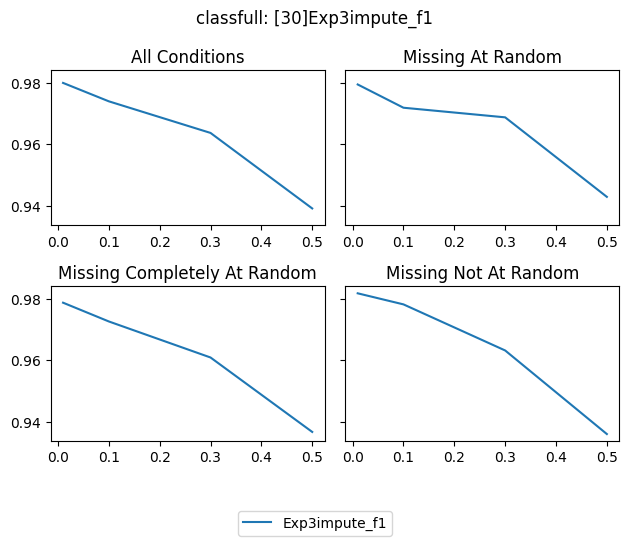

In [6]:
display_scores_over_options(class_data, score_type='Exp3impute_f1', complex=True, savepath='/Users/gabrielketron/tpot2_addimputers/tpot2/ImputerExperiments/data/c/Saved_Analysis/', dataset_list=[30])
